<a id = 'toc'></a>
# Table of Contents

- ### [Trend, Seasonality, Noise](#trend_seasonality_noise)
- ### [Factors](#factors)
    - [Window Functions](#window_functions)
    - [Moving Average](#moving_average)
    - [Lags](#lags)
- ### [AR (Autoregressive) model](#ar_model)

<a id = 'trend_seasonality_noise'></a>
# Trend, Seasonality, Noise

"Seasonal decompose" helps us to decompose the time series into trend and seasonality. 



In [15]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('Upload/15.5.AirPassengers.csv')
df.columns = ['month', 'passengers']
df.head()

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       144 non-null    object
 1   passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [18]:
df = df.set_index(pd.DatetimeIndex(df['month']))
df.head()

,month,passengers
month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [19]:
df.drop(columns = ['month'], axis = 0, inplace = True)

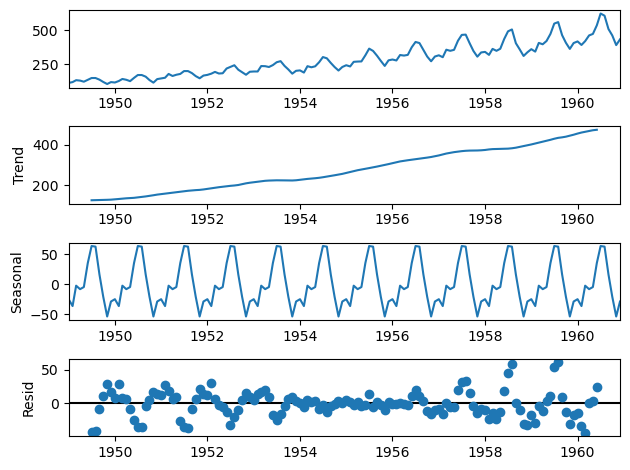

In [20]:
decomposition = seasonal_decompose(df, model = 'addative')
decomposition.plot()
plt.show()

In [7]:
trend_part = decomposition.trend
seasonal_part = decomposition.seasonal
residual_part = decomposition.resid

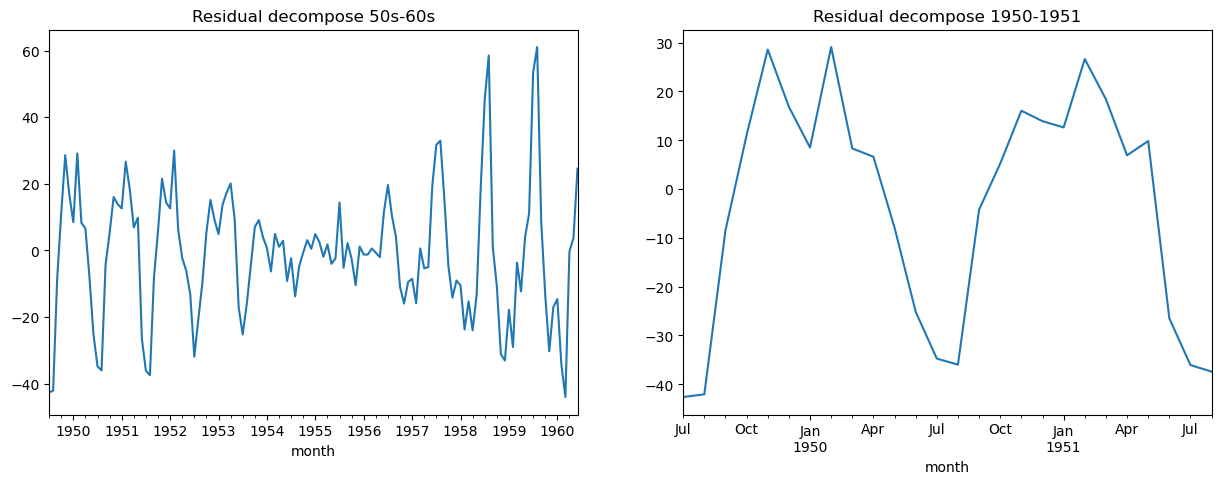

In [8]:
residual_part = residual_part.dropna()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (15, 5))
residual_part.plot(ax = ax1)
residual_part['1949-07-01':'1951-08-01'].plot(ax = ax2)
ax1.set_title('Residual decompose 50s-60s')
ax2.set_title('Residual decompose 1950-1951')
plt.show()

<a id = 'factors'></a>
# Factors

<a id = 'window_functions'></a>
## Window Functions in Pandas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv('Upload/15.8.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df.reset_index(drop = True, inplace = True)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186


In [11]:
def myMax(value):
    return max(value)

df['rolling_mean'] = df.close.rolling(window = 5).mean()
df['rolling_std'] = df.close.rolling(window = 5).std()
df['rolling_max'] = df.close.rolling(window = 5).apply(myMax, raw = False)

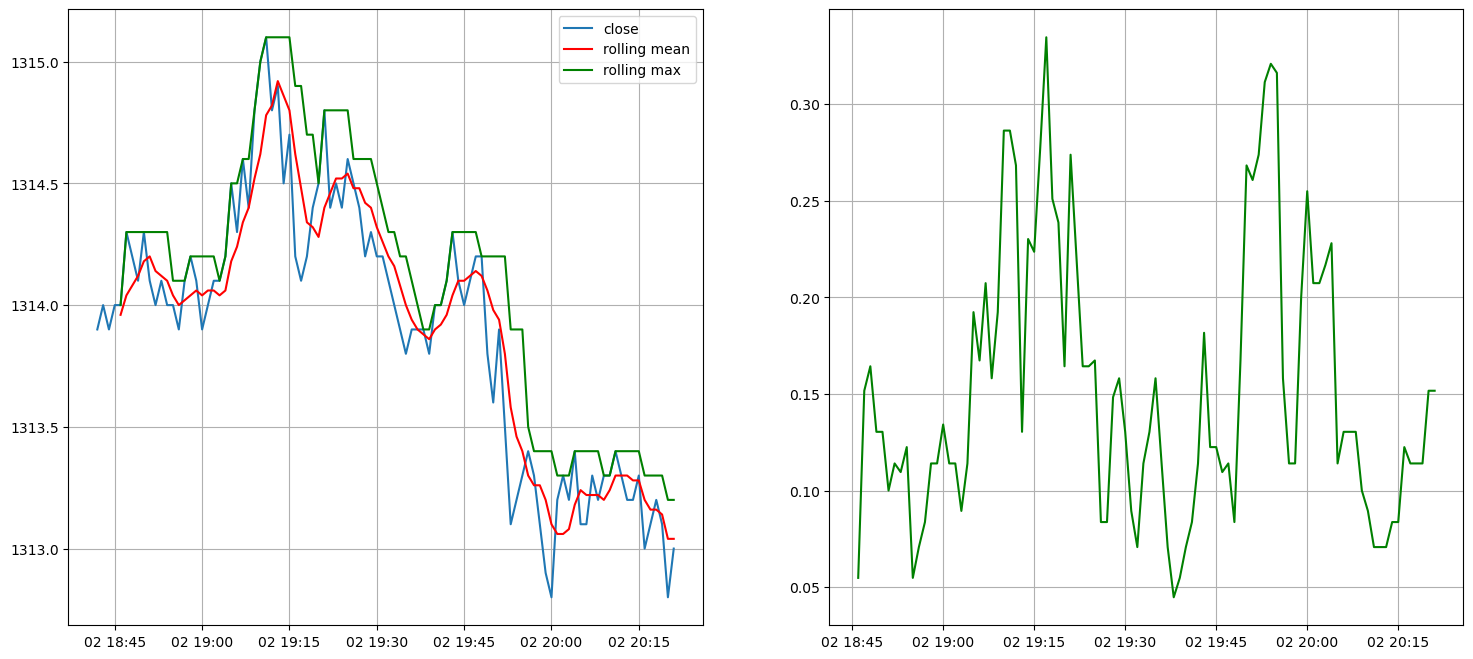

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close)
ax[0].plot(df.ts, df.rolling_mean, c='r')
ax[0].plot(df.ts, df.rolling_max,  c='g')
ax[0].legend(['close', 'rolling mean', 'rolling max'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

<a id = 'moving_average'></a>
## Moving Average

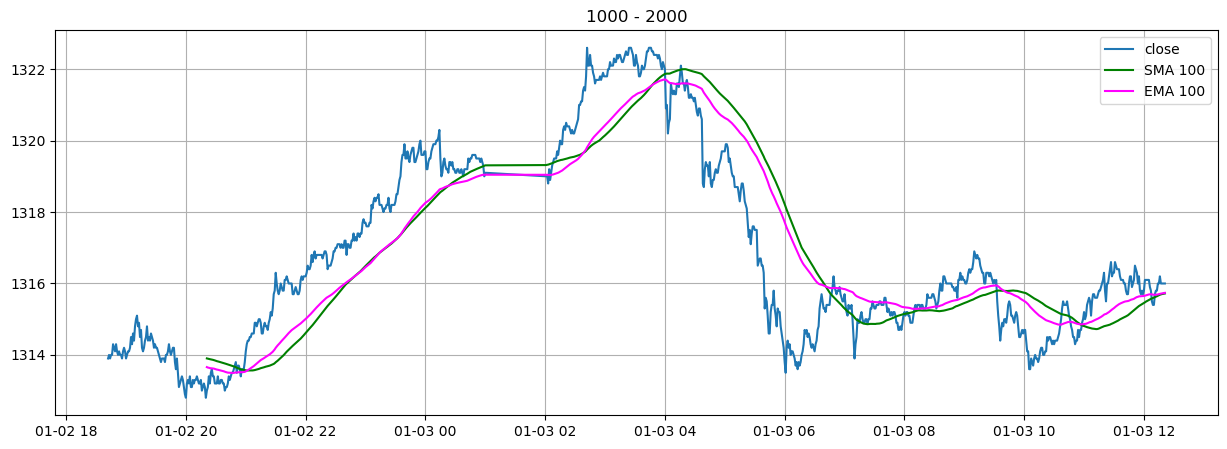

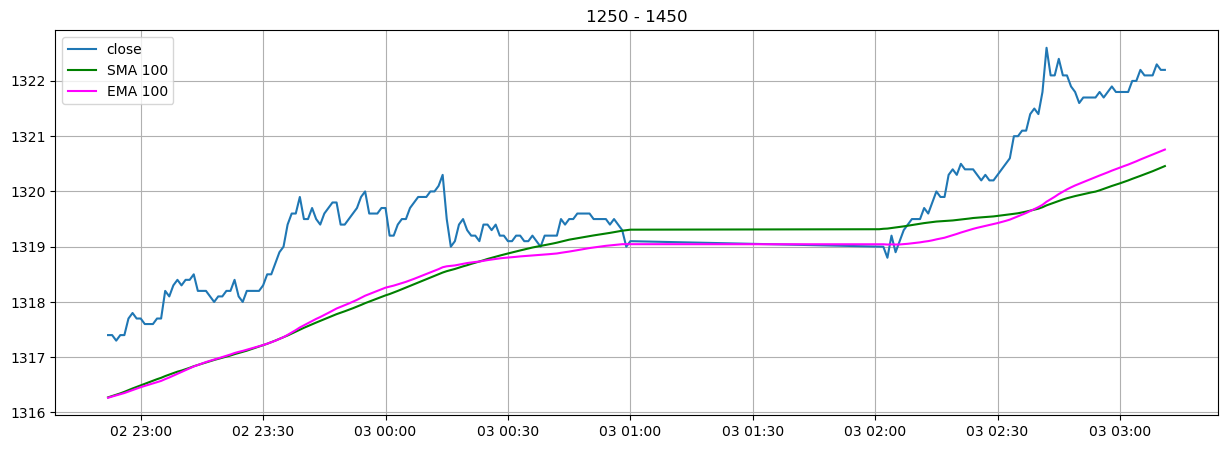

In [13]:
df = pd.read_csv('Upload/15.8.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:2000]

df['rolling_mean_100'] = df.close.rolling(window = 100).mean()
df['rolling_ema_100'] = df.close.ewm(min_periods = 100, span = 100).mean()

fig, axes = plt.subplots(1, 1, figsize = (15,5))

axes.plot(df.ts, df['close'])
axes.plot(df.ts, df['rolling_mean_100'], c = 'g')
axes.plot(df.ts, df['rolling_ema_100'], c = 'magenta')
axes.legend(['close', 'SMA 100', 'EMA 100'])
axes.set_title('1000 - 2000')
axes.grid()

fig, axes = plt.subplots(1, 1, figsize = (15,5))

axes.plot(df.ts[250:450], df['close'][250:450])
axes.plot(df.ts[250:450], df['rolling_mean_100'][250:450], c = 'g')
axes.plot(df.ts[250:450], df['rolling_ema_100'][250:450], c = 'magenta')
axes.legend(['close', 'SMA 100', 'EMA 100'])
axes.set_title('1250 - 1450')
axes.grid()

plt.show()

<a id = 'lags'></a>
## Lags

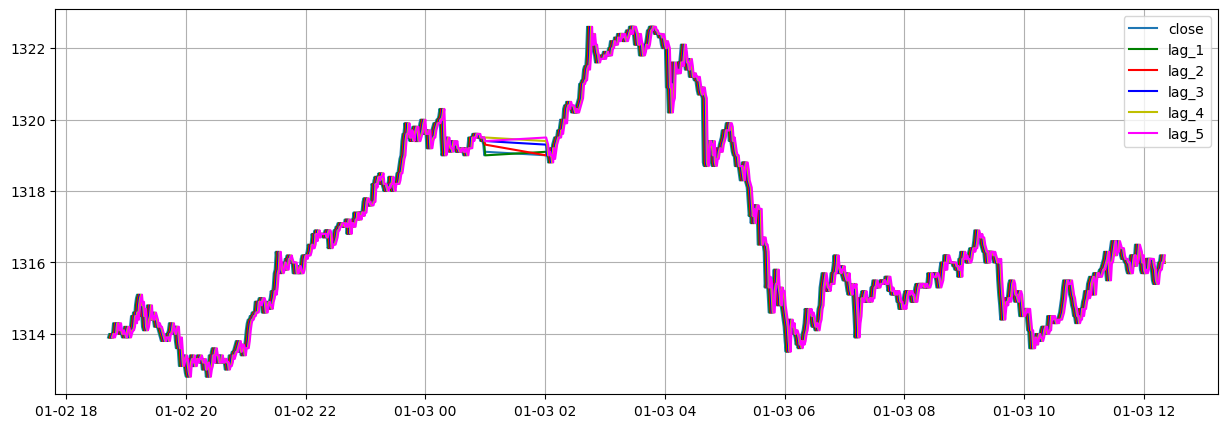

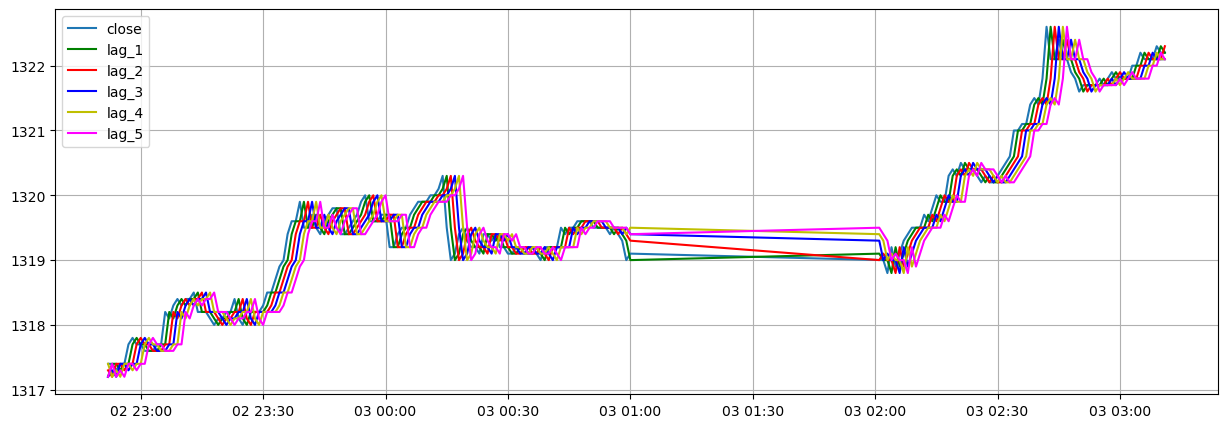

In [14]:
for i in range(1,6):
    df['lag_{}'.format(i)] = df.close.shift(i)


f, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(df.ts, df.close)
ax.plot(df.ts, df['lag_' + str(1)],  c='g') 
ax.plot(df.ts, df['lag_' + str(2)],  c='r') 
ax.plot(df.ts, df['lag_' + str(3)],  c='b') 
ax.plot(df.ts, df['lag_' + str(4)],  c='y') 
ax.plot(df.ts, df['lag_' + str(5)],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

f, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(df.ts[250:450], df.close[250:450])
ax.plot(df.ts[250:450], df['lag_' + str(1)][250:450],  c='g') 
ax.plot(df.ts[250:450], df['lag_' + str(2)][250:450],  c='r') 
ax.plot(df.ts[250:450], df['lag_' + str(3)][250:450],  c='b') 
ax.plot(df.ts[250:450], df['lag_' + str(4)][250:450],  c='y') 
ax.plot(df.ts[250:450], df['lag_' + str(5)][250:450],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

<a id = 'ar_model'></a>
# AR (Autoregressive) model

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Generate time series data

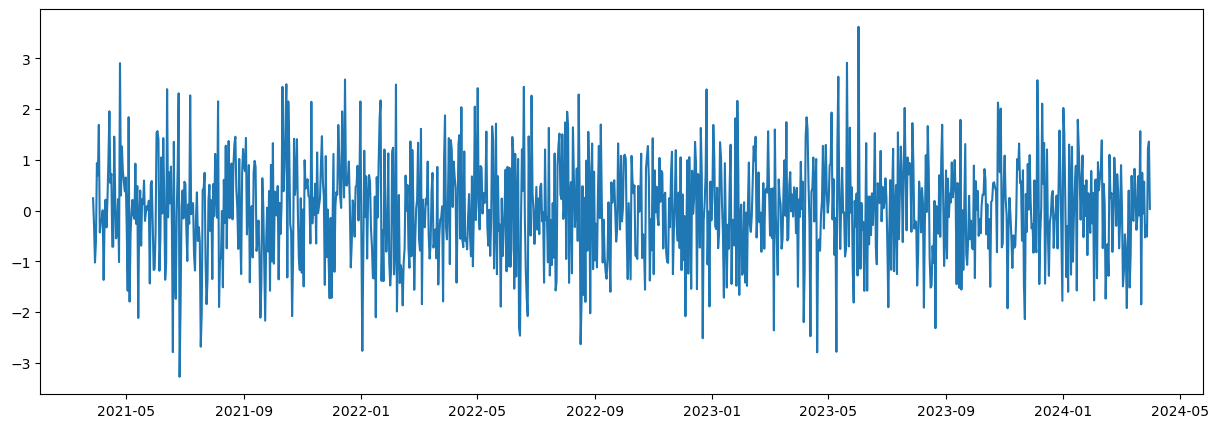

In [332]:
num = 1100

date_today = datetime.datetime.today()
date_list = pd.to_datetime([date_today - datetime.timedelta(days = x) for x in range(num)]).date

generator = np.random.default_rng(seed = 11)
y = generator.standard_normal((num, 1))
z = generator.random((num, 1))

df_test = pd.DataFrame(np.c_[y, z], columns = ['close', 'open'], index = pd.DatetimeIndex(date_list))
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(df_test.index, df_test['close'])
plt.show()

## Analyse time series data

#### Check the distribution inside different windows

[DIST 1 - DIST 2]: 0.979
[DIST 2 - DIST 3]: 0.414
[DIST 1 - DIST 3]: 0.708


<Axes: xlabel='close', ylabel='Density'>

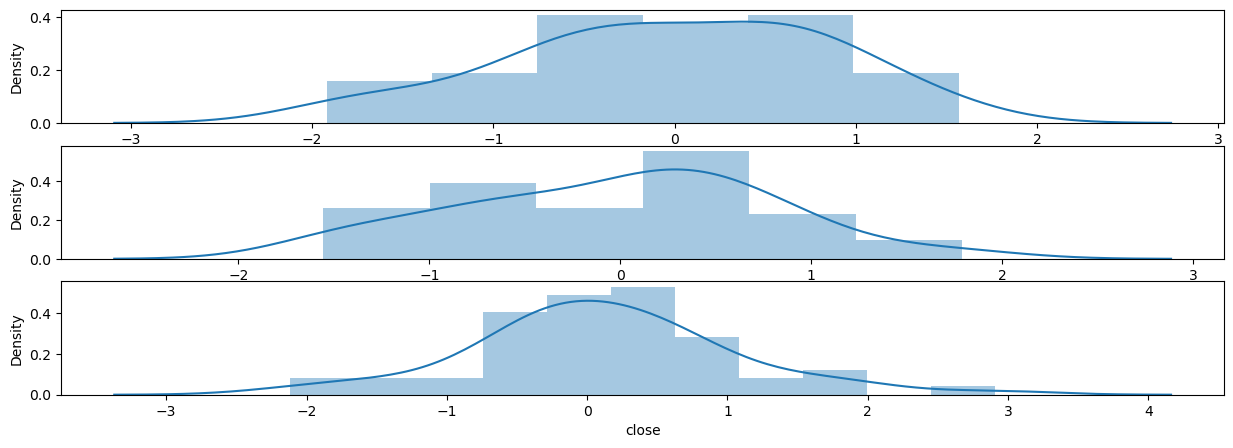

In [349]:
import seaborn as sns
from scipy.stats import ks_2samp

dist_split_1 = df_test.iloc[:int(len(df_test) * .05)]['close']
dist_split_2 = df_test.iloc[int(len(df_test) * .15):int(len(df_test) * .2)]['close']
dist_split_3 = df_test.iloc[-int(len(df_test) * .05):-1]['close']

print(f'[DIST 1 - DIST 2]: {ks_2samp(dist_split_1, dist_split_2)[1]:.3f}')
print(f'[DIST 2 - DIST 3]: {ks_2samp(dist_split_2, dist_split_3)[1]:.3f}')
print(f'[DIST 1 - DIST 3]: {ks_2samp(dist_split_1, dist_split_3)[1]:.3f}')

fig, ax = plt.subplots(3, 1, figsize = (15, 5))
sns.distplot(dist_split_1, ax = ax[0])
sns.distplot(dist_split_2, ax = ax[1])
sns.distplot(dist_split_3, ax = ax[2])

<div class = 'alert alert-info'>
    <p>
        Interpretation:
    </p>
</div>

#### Decomposition

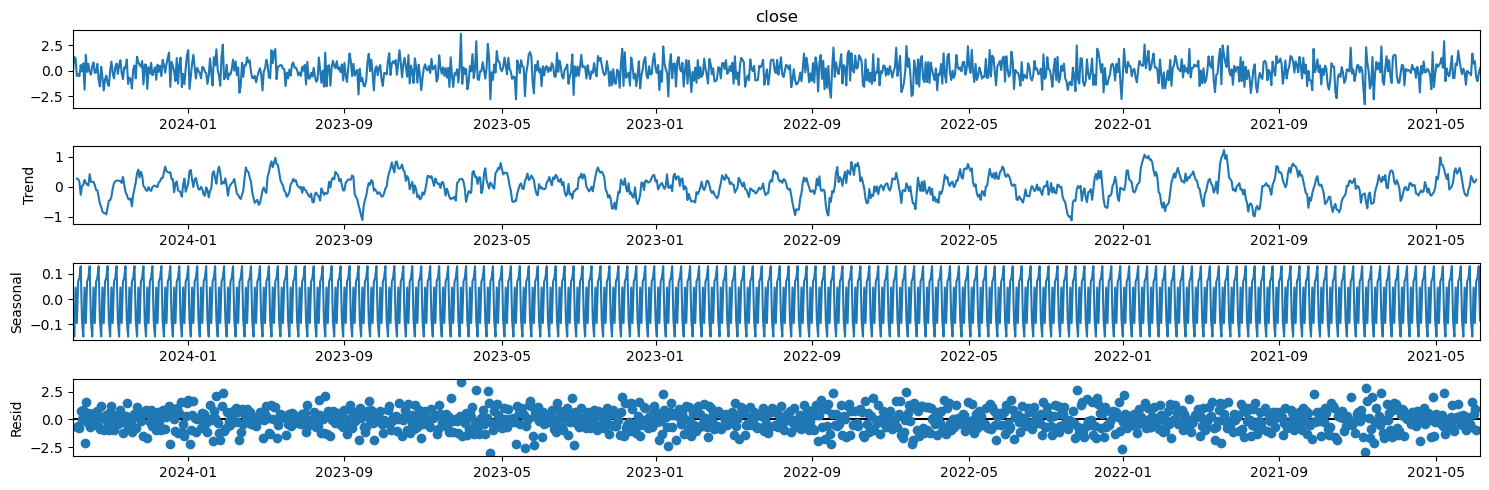

In [239]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposer = seasonal_decompose(df_test['close'], model = 'additive')

fig = decomposer.plot()
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

<div class = 'alert alert-info'>
    <p>
        <b>INTERPRETATION:</b> Time Series relies on the assumption that the observations 
    </p>
</div>

#### AR (Autoregressive) Model

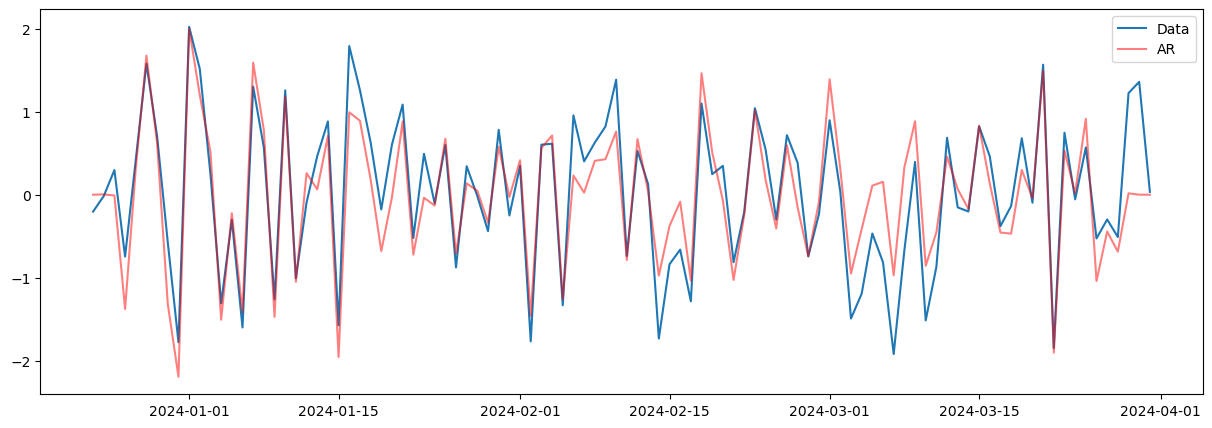

In [4]:
# Get residuals as noise from days
df_test['resid'] = decomposer.resid
df_test['resid'] = df_test['resid'].fillna(0)

# Get constant from trend
trend = decomposer.trend
constant = trend[~np.isnan(trend)].mean()

# AR
temp_list = []
count = 1

for i in range(len(df_test)):
    if count < len(df_test):
        x = constant * df_test.iloc[count - 1]['close'] + df_test.iloc[count]['resid']
        temp_list.append(x)
        count += 1
        
temp_list.insert(0, 0.)
df_test['ar'] = temp_list

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(df_test.index, df_test['close'])
ax.plot(df_test.index, df_test['ar'], c = 'r', alpha = .5)
ax.legend(['Data', 'AR'])
plt.show()

### Testing AutoReg on Time Series

NameError: name 'df' is not defined

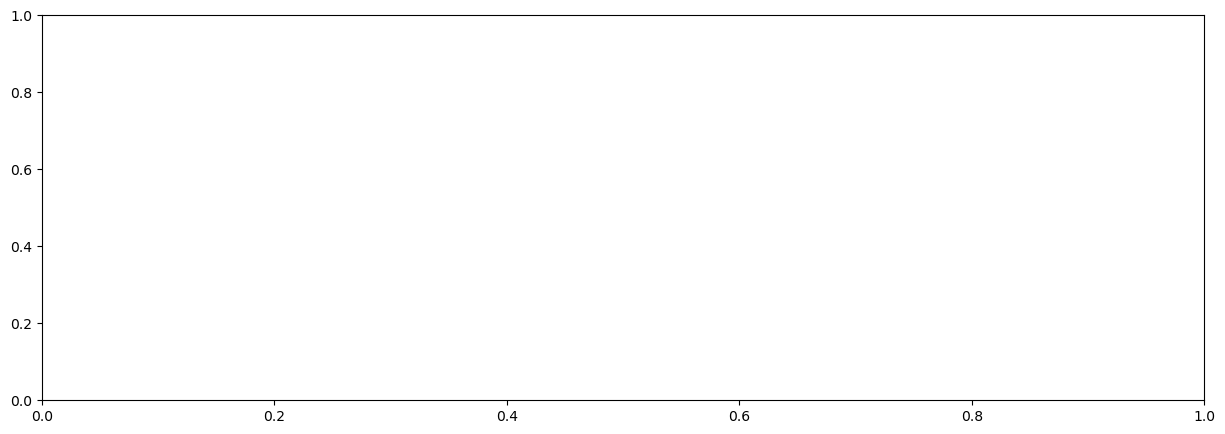

In [11]:
# Upload data, set datetime index
data = pd.read_csv('Upload/15.8.csv')
data['date'] = pd.to_datetime(data['ts']).dt.date
data = data.set_index(pd.DatetimeIndex(data['date'])).drop(columns = ['ts', 'date'])
#data = data['close']

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(df.index, df['close'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(data['close'])

print(f'1. Critical Value of the data: {adfuller_test[0]}')
print(f'2. P-Value: {adfuller_test[1]}')
print(f'3. Lags used in the regression to determine T-statistic: {adfuller_test[2]}')
print(f'4. Number of observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to adfuller test:')
for key, val in adfuller_test[4].items():
    print(f'\t → {key} : {val}')

So the time series is non stationary, what means, we cannot use AR models?
We can difference the time series. How? 

## Differencing: Order 1

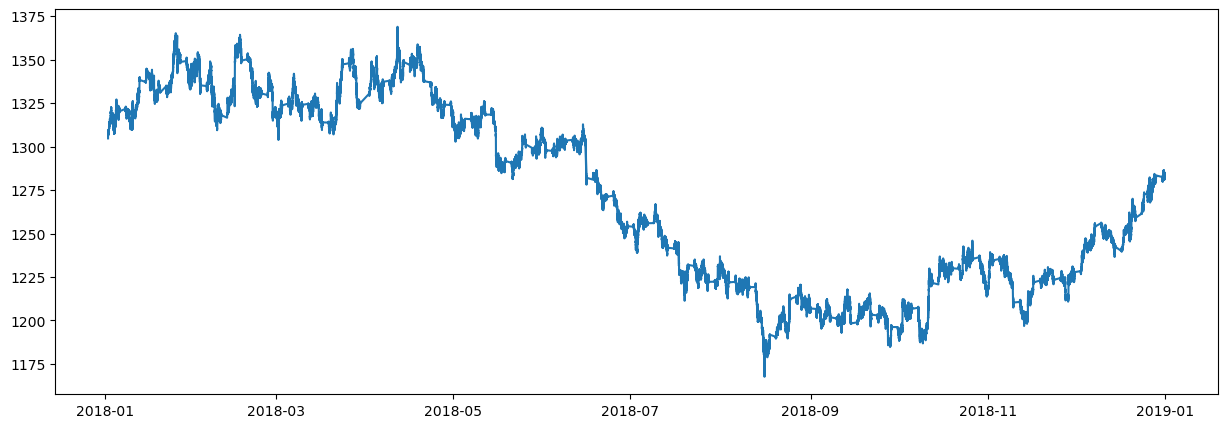

In [157]:
# Upload data, set datetime index
data = pd.read_csv('Upload/15.8.csv')
data['date'] = pd.to_datetime(data['ts'])
data = data.set_index(pd.DatetimeIndex(data['date'])).drop(columns = ['ts', 'date'])
#data = data['close']

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(data.index, data['close'])
plt.show()

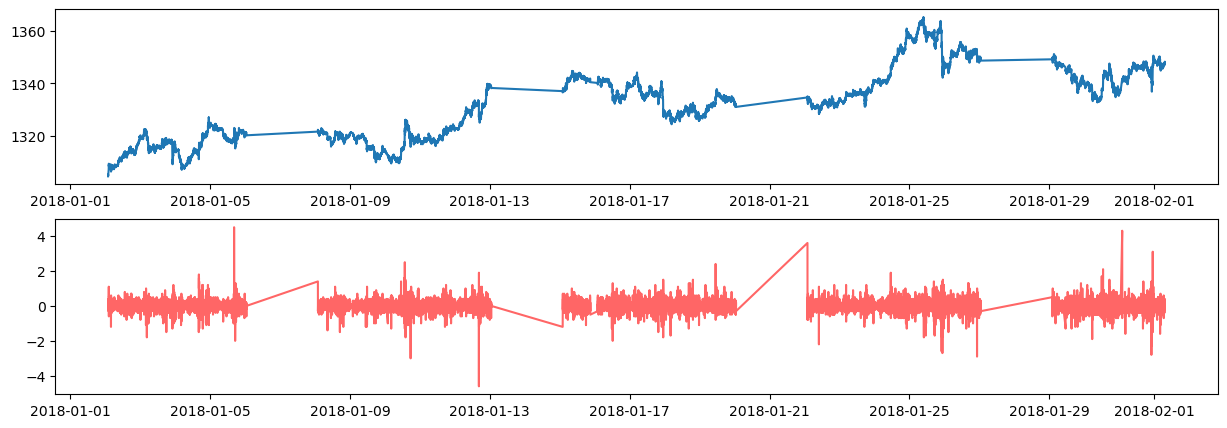

In [158]:
# Use differencing method
fill_val = data.iloc[0]['close']
data['shift1'] = data['close'].shift(1).fillna(fill_val)
data['difference'] = data['close'] - data['shift1']

# Range the dataset and plot the close and difference columns
test = data.iloc[0:30000]
fig, ax = plt.subplots(2, 1, figsize = (15, 5))
ax[0].plot(test.index, test['close'])
ax[1].plot(test['difference'], c = 'r', alpha = .6)
plt.show()

#### Use Adfuller test to check if the difference column is stationary

In [159]:
from statsmodels.tsa.stattools import adfuller

#### Adfuller - Column Close

In [232]:
test = data.iloc[0:50000]

adfuller_close = adfuller(test['close'])
print(f'1. ADF - Critical Value: {adfuller_close[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_close[1]:.4f} → The TIME SERIES is NOT STATIONARY')
print(f'3. Lags used for regression: {adfuller_close[2]}')
print(f'4. Observations used in the analysis: {adfuller_close[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_close[4].items():
    print(f'\t ► {key} : {val:.2f}')

1. ADF - Critical Value: -2.64
2. P-Value: Reject HA (NOT reject H0): 0.0846 → The TIME SERIES is NOT STATIONARY
3. Lags used for regression: 9
4. Observations used in the analysis: 49990
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


#### Adfuller - Column Difference

In [16]:
test = data.iloc[0:30000]

adfuller_diff = adfuller(test['difference'])
print(f'1. ADF - Critical Value: {adfuller_diff[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_diff[1]:.4f} → The TIME SERIES is STATIONARY')
print(f'3. Lags used for regression: {adfuller_diff[2]}')
print(f'4. Observations used in the analysis: {adfuller_diff[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_diff[4].items():
    print(f'\t ► {key} : {val:.2f}')

1. ADF - Critical Value: -104.84
2. P-Value: Reject HA (NOT reject H0): 0.0000 → The TIME SERIES is STATIONARY
3. Lags used for regression: 2
4. Observations used in the analysis: 29997
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


#### ACF and PACF

In [246]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

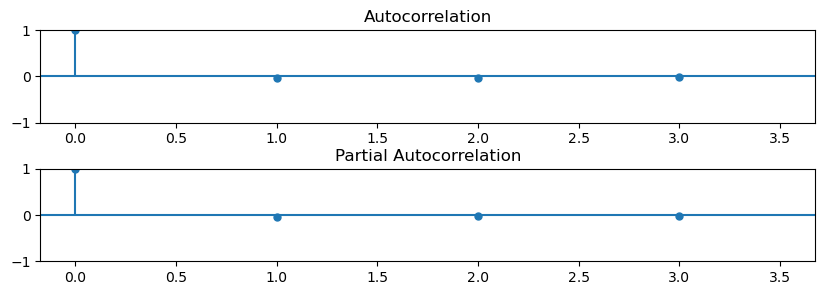

In [266]:
# ACF
fig, ax = plt.subplots(2, 1, figsize = (10, 3))
plot_acf(test['difference'], lags = 3, ax = ax[0])
plot_pacf(test['difference'], lags = 3, ax = ax[1])
plt.subplots_adjust(hspace = .5, wspace = .5)
plt.show()

#### Testing AutoReg on Differenced Data

In [17]:
from statsmodels.tsa.ar_model import ar_select_order

import warnings
warnings.filterwarnings(action = 'ignore')

In [18]:
# Train and Test split
x_train, x_test = np.split(test, [int(len(test) * .3)])

In [19]:
model = AutoReg(x_train['difference'], lags = 2).fit()

In [20]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             difference   No. Observations:                 9000
Model:                     AutoReg(2)   Log Likelihood                 521.747
Method:               Conditional MLE   S.D. of innovations              0.228
Date:                Sun, 31 Mar 2024   AIC                          -1035.495
Time:                        16:28:25   BIC                          -1007.076
Sample:                             2   HQIC                         -1025.824
                                 9000                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.002      0.946      0.344      -0.002       0.007
difference.L1    -0.0073      0.011     -0.696      0.487      -0.028       0.013
difference.L2    -0.0332      0.011     

# TEST YOUR MIGHT

In [170]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [171]:
df = pd.read_csv('Upload/15.8.csv')

#### Plot

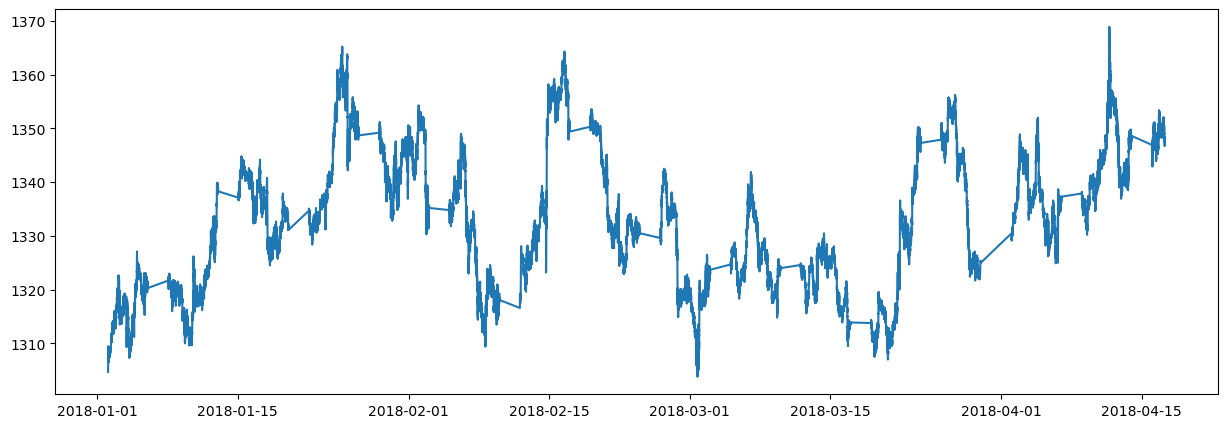

In [172]:
test = df.copy()
test = test.iloc[0:100000]

test = test.set_index(pd.DatetimeIndex(test['ts'])).sort_index()
test.index = test.index.rename('datetimeindex')
test = test.drop(columns = test.columns.difference(['close']))

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(test.index, test['close'])
plt.show()

#### Decomposer

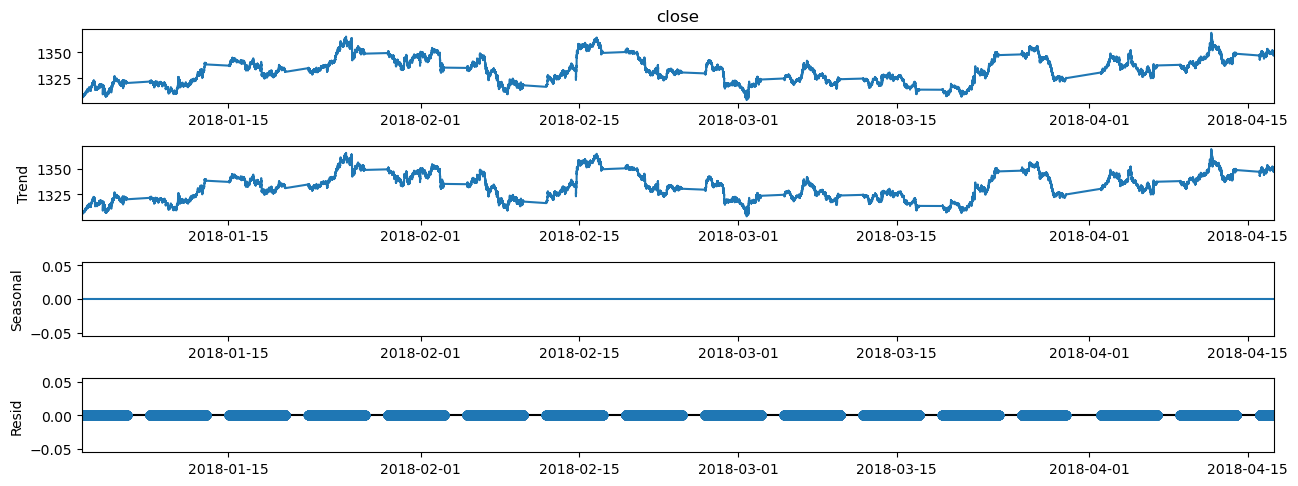

In [173]:
decomposer = seasonal_decompose(test['close'], model = 'additive', period = 1)
fig = decomposer.plot()
fig.set_size_inches((15, 5))
plt.show()

#### Adfuller

In [197]:
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(test.iloc[:1000]['close'])
print(f'1K OBSERVATIONS')
print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value to reject HA: {adfuller_test[1]:.2f} → The Time Series does NOT include Stationarity')
print(f'3. Lags: {adfuller_test[2]}')
print(f'4. Num of observations used: {adfuller_test[3]}')
print(f'5. ADF - Critical Value:')
for key, val in adfuller_test[4].items():
    print(f'\t ► {key} : {val:.2f}')

1K OBSERVATIONS
1. ADF - Critical Value: -2.05
2. P-Value to reject HA: 0.27 → The Time Series does NOT include Stationarity
3. Lags: 0
4. Num of observations used: 999
5. ADF - Critical Value:
	 ► 1% : -3.44
	 ► 5% : -2.86
	 ► 10% : -2.57


In [182]:
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(test.iloc[:10000]['close'])
print(f'10K OBSERVATIONS')
print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value to reject HA: {adfuller_test[1]:.2f} → The Time Series include Stationarity')
print(f'3. Lags: {adfuller_test[2]}')
print(f'4. Num of observations used: {adfuller_test[3]}')
print(f'5. ADF - Critical Value:')
for key, val in adfuller_test[4].items():
    print(f'\t ► {key} : {val:.2f}')

10K OBSERVATIONS
1. ADF - Critical Value: -3.42
2. P-Value to reject HA: 0.01 → The Time Series include Stationarity
3. Lags: 6
4. Num of observations used: 9993
5. ADF - Critical Value:
	 ► 1% : -3.43
	 ► 5% : -2.86
	 ► 10% : -2.57


In [230]:
from statsmodels.tsa.ar_model import ar_select_order
ar_select_order(test.iloc[:100000], maxlag = 12).ar_lags

[1, 2, 3]

In [210]:
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings(action = 'ignore')

ar_select_order(test.iloc[:100000], maxlag = 12).ar_lags

[1, 2, 3]

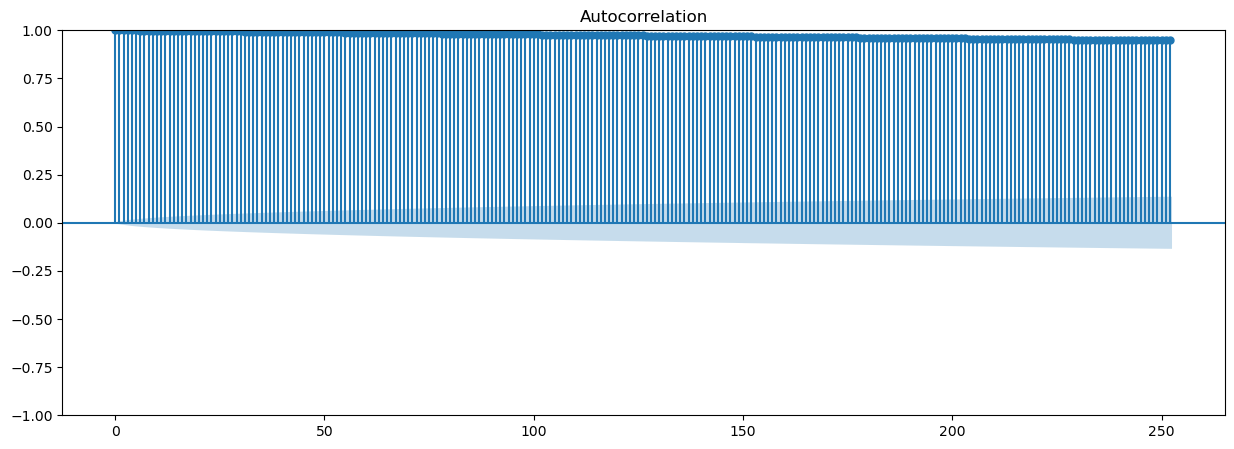

In [224]:
fig = plot_acf(test.iloc[:100000], lags = 252)
fig.set_size_inches((15, 5))

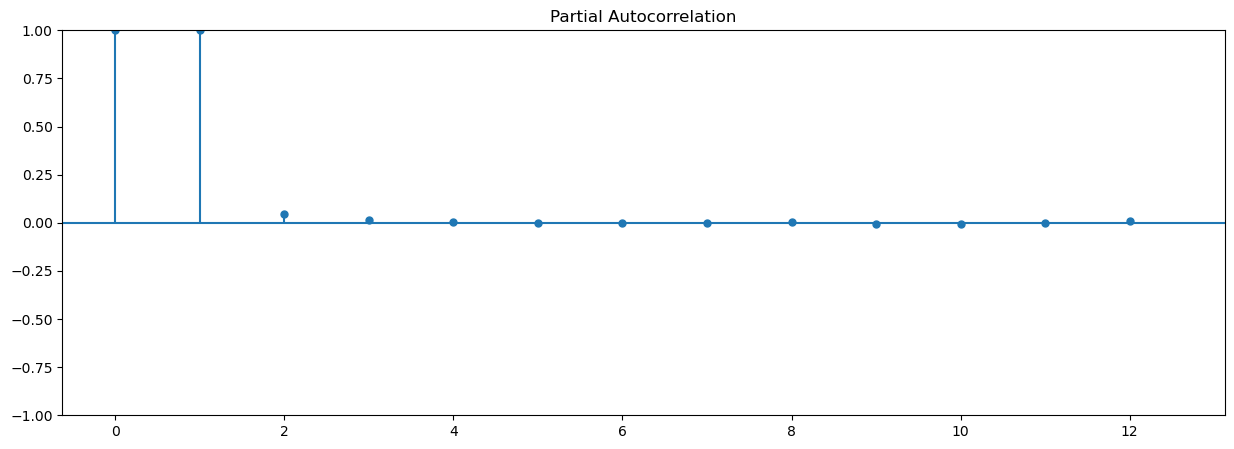

In [229]:
fig = plot_pacf(test.iloc[:100000], lags = 12)
fig.set_size_inches((15, 5))

### Plot seasonal decompose from generated data-points

In [132]:
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose

# period = 10
# generator = np.random.default_rng(seed = 11)
# y = np.cos(2 * np.pi * np.linspace(0., 10., 10*period))
# y += generator.standard_normal(y.shape)

# decompose = seasonal_decompose(y, model = 'additive', period = period)
# fig = decompose.plot()
# fig.set_size_inches((15, 5))
# fig.tight_layout()
# plt.show()

In [20]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt 

from statsmodels.tsa.ar_model import AutoReg

In [21]:
date_today = datetime.datetime.today()
date_list = pd.to_datetime([date_today - datetime.timedelta(days = x) for x in range(1000)]).date

In [25]:
generator = np.random.default_rng(seed = 11)
y = generator.standard_normal((1000, 1))

df = pd.DataFrame(y, columns = ['close'], index = pd.DatetimeIndex(date_list))

In [33]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adfuller_test = adfuller(df)
print(f'ADF: {adfuller_test[0]}')
print(f'P-value: {adfuller_test[1]}')
print(f'Num of Lags: {adfuller_test[2]}')
print(f'Num of obs. used: {adfuller_test[3]}')
print(f'Critical Values:')
for key, val in adfuller_test[4].items():
    print(f'→ {key} : {val}')

ADF: -31.65625666734523
P-value: 0.0
Num of Lags: 0
Num of obs. used: 999
Critical Values:
→ 1% : -3.4369127451400474
→ 5% : -2.864437475834273
→ 10% : -2.568312754566378
